# Modified Power Spectrum Multipoles

In this tutorial, we show how you can calculate the power spectrum multipole modifications due to primordial non-Gaussianity (PNG) $f_\textrm{NL}$ and relativistic effects the ``clustering_modification`` module. The fiducial cosmology is Planck15, and we set the fiducial redshift $z = 1$, fiducial linear bias $b_1 = 2$ and fiducial $f_\textrm{NL} = 1$.

In [1]:
%%capture
# nbodykit matplotlib warnings suppression

from horizonground.clustering_modification import (
    non_gaussianity_correction_factor, relativistic_correction_factor, standard_kaiser_factor
)
from horizonground.lumfunc_modeller import LumFuncModeller, quasar_PLE_lumfunc
from horizonground.utils import get_test_data_loc
from nbodykit.cosmology import LinearPower, Planck15

REDSHIFT = 1.
BIAS = 2.
PNG = 1.

We need a luminosity function model to compute relativistic biases.

In [2]:
lumfunc_modeller = LumFuncModeller.from_parameter_file(
    parameter_file=get_test_data_loc("eBOSS_QSO_LF_PLE_model_fits.txt"),
    model_lumfunc=quasar_PLE_lumfunc,
    brightness_variable='magnitude',
    threshold_value=22.5,
    cosmology=Planck15
)

We calculate the matter power spectrum, Kaiser multipoles and corrections factors for PNG and relativistic effects.

In [3]:
import numpy as np

MULTIPOLE = 0

sample_wavenumbers = np.logspace(-4, -1, 30)
matter_power_spectrum = LinearPower(Planck15, REDSHIFT)(sample_wavenumbers)

kaiser_monopole = standard_kaiser_factor(MULTIPOLE, BIAS, REDSHIFT, cosmo=Planck15) * matter_power_spectrum

non_Gaussianity_monopole = kaiser_monopole + non_gaussianity_correction_factor(
    sample_wavenumbers, MULTIPOLE, PNG, BIAS, REDSHIFT, cosmo=Planck15, tracer_p=1.6
) * matter_power_spectrum

relativistic_monopole = kaiser_monopole + relativistic_correction_factor(
    sample_wavenumbers, MULTIPOLE, REDSHIFT, BIAS, cosmo=Planck15, 
    evolution_bias=lumfunc_modeller.evolution_bias, 
    magnification_bias=lumfunc_modeller.magnification_bias
) * matter_power_spectrum

Visualise the modified power spectrum.

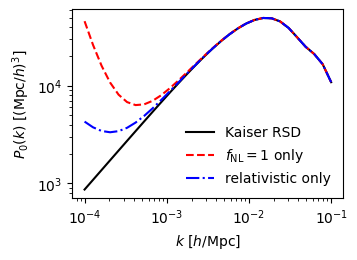

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(3.5, 2.5), dpi=100)
plt.loglog(sample_wavenumbers, kaiser_monopole, ls='-', c='k', label="Kaiser RSD")
plt.loglog(sample_wavenumbers, non_Gaussianity_monopole, ls='--', c='r', label=r"$f_\mathrm{NL} = 1$ only")
plt.loglog(sample_wavenumbers, relativistic_monopole, ls='-.', c='b', label=r"relativistic only")
plt.legend(frameon=False)
plt.xlabel(r"$k$ [$h$/Mpc]")
plt.ylabel(r"$P_0(k)$ [$(\mathrm{Mpc}/h)^3$]")
plt.show()